In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
morphine_eras_count = pd.read_csv("morphine_eras_count_without_eid.csv")
print(morphine_eras_count)

      num_drug_era_id                             start_dates  \
0                   1                          ['2013-06-02']   
1                   1                                   [nan]   
2                   1                          ['2013-08-04']   
3                   1                          ['2015-07-05']   
4                   1                          ['2015-11-09']   
...               ...                                     ...   
7212                4  [nan, '2013-12-12', nan, '2013-01-03']   
7213                2                              [nan, nan]   
7214                1                          ['2003-05-08']   
7215                1                                   [nan]   
7216                3       ['2012-08-11', '2012-02-07', nan]   

                          end_dates exposure_counts       gap_days  
0                    ['2013-12-03']             [2]            [0]  
1                    ['2008-11-08']             [1]            [0]  
2           

In [ ]:
# Clean data: Convert string representations of lists to actual lists
morphine_eras_count["exposure_counts"] = morphine_eras_count["exposure_counts"].apply(
    eval
)
morphine_eras_count["gap_days"] = morphine_eras_count["gap_days"].apply(eval)

# Analyze num_drug_era_id
print("Summary of num_drug_era_id:")
print(morphine_eras_count["num_drug_era_id"].describe())

# Total exposures per participant
morphine_eras_count["total_exposure_counts"] = morphine_eras_count[
    "exposure_counts"
].apply(sum)

# Analyze total exposure counts
print("\nSummary of total exposure counts:")
print(morphine_eras_count["total_exposure_counts"].describe())

# Average gap days per participant (ignoring NaN gaps)
morphine_eras_count["average_gap_days"] = morphine_eras_count["gap_days"].apply(
    lambda x: np.nanmean(x)
)  # Exclude NaN
print(morphine_eras_count)

Summary of num_drug_era_id:
count    7217.000000
mean        2.077872
std         3.451562
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        80.000000
Name: num_drug_era_id, dtype: float64

Summary of total exposure counts:
count    7217.000000
mean       15.735901
std        44.949850
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max      1004.000000
Name: total_exposure_counts, dtype: float64
      num_drug_era_id                             start_dates  \
0                   1                          ['2013-06-02']   
1                   1                                   [nan]   
2                   1                          ['2013-08-04']   
3                   1                          ['2015-07-05']   
4                   1                          ['2015-11-09']   
...               ...                                     ...   
7212                4  [nan, '2013-12-12', nan, '2013-01-03']   

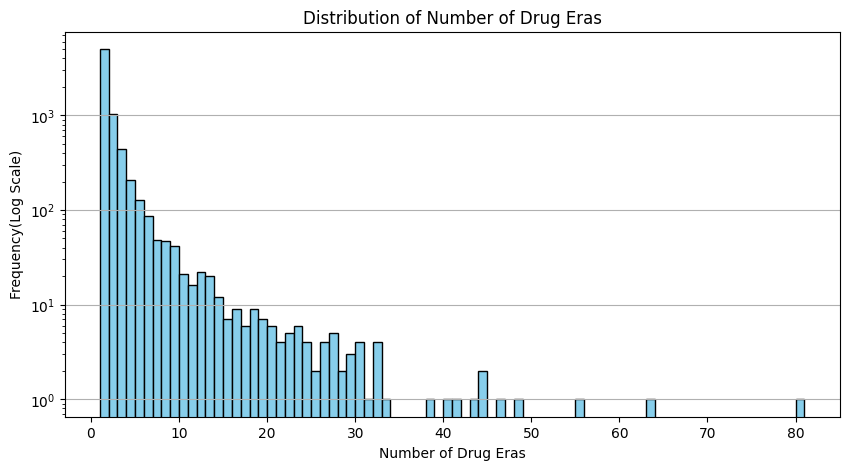

In [ ]:
# Visualize num_drug_era_id
plt.figure(figsize=(10, 5))
plt.hist(
    morphine_eras_count["num_drug_era_id"],
    bins=range(1, morphine_eras_count["num_drug_era_id"].max() + 2),
    color="skyblue",
    edgecolor="black",
)
plt.title("Distribution of Number of Drug Eras")
plt.xlabel("Number of Drug Eras")
plt.ylabel("Frequency(Log Scale)")
plt.yscale("log")  # Logarithmic scale for y-axis
plt.grid(axis="y")
plt.show()

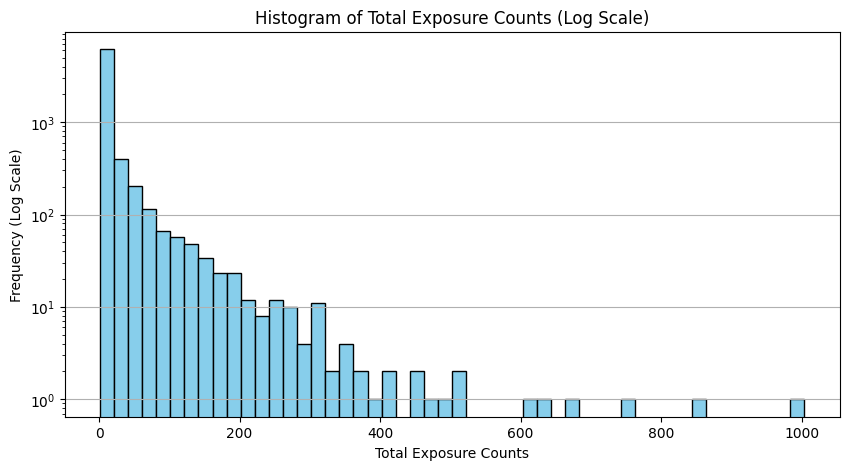

In [ ]:
# Visualize total exposure counts
plt.figure(figsize=(10, 5))
plt.hist(
    morphine_eras_count["total_exposure_counts"],
    bins=50,
    color="skyblue",
    edgecolor="black",
)
plt.yscale("log")  # Logarithmic scale for y-axis
plt.title("Distribution of Total Exposure Counts (Log Scale)")
plt.xlabel("Total Exposure Counts")
plt.ylabel("Frequency (Log Scale)")
plt.grid(axis="y")

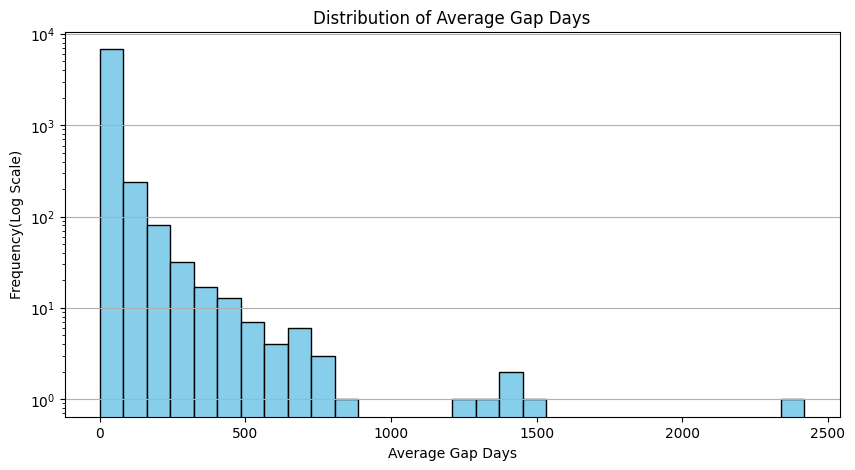

In [ ]:
# Visualize average gap days
plt.figure(figsize=(10, 5))
plt.hist(
    morphine_eras_count["average_gap_days"].dropna(),
    bins=30,
    color="skyblue",
    edgecolor="black",
)
plt.title("Distribution of Average Gap Days")
plt.xlabel("Average Gap Days")
plt.ylabel("Frequency(Log Scale)")
plt.yscale("log")  # Logarithmic scale for y-axis
plt.grid(axis="y")
plt.show()

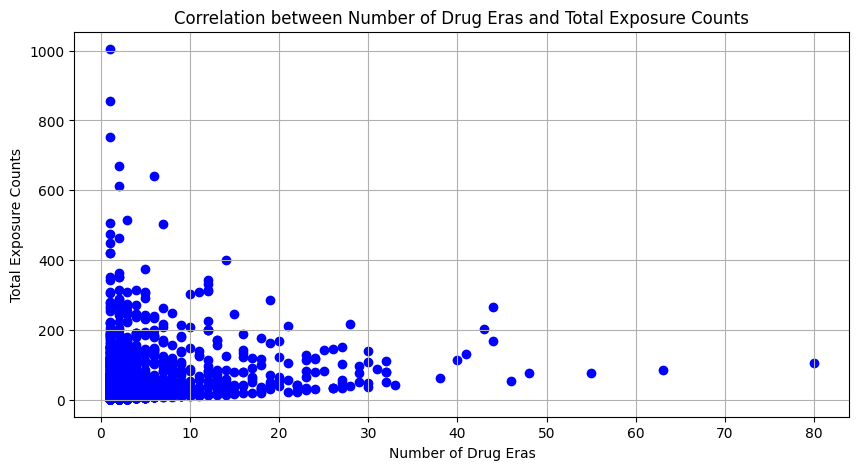


Correlation between num_drug_era_id and total_exposure_counts:
                       num_drug_era_id  total_exposure_counts
num_drug_era_id                1.00000                0.29535
total_exposure_counts          0.29535                1.00000


In [ ]:
# Correlation between num_drug_era_id and total exposure counts
plt.figure(figsize=(10, 5))
plt.scatter(
    morphine_eras_count["num_drug_era_id"],
    morphine_eras_count["total_exposure_counts"],
    c="blue",
)
plt.title("Correlation between Number of Drug Eras and Total Exposure Counts")
plt.xlabel("Number of Drug Eras")
plt.ylabel("Total Exposure Counts")
plt.grid()
plt.show()

# Insights
print("\nCorrelation between num_drug_era_id and total_exposure_counts:")
print(morphine_eras_count[["num_drug_era_id", "total_exposure_counts"]].corr())